**TASK**

- Perfrorm **exploratory data analysis** over the given dataset. Take 3-5 features for a detailed analysis.

**INTRODUCTION**

The dataset was obtained through a study on the success of telemarketing calls for selling long-term bank deposits. The data was taken from a Portugese bank during 6 consequent years (2008-2013) capturing the financial crisis. The present dataset with 22 features is a reduced one compared the original dataset of 150 features. 

At the time of the study, contacting potential customers via telephone was one of the core marketing channels. Therefore, correctly assessing the success of this major channel was crucial for the marketing management.

This problem is solvable with the help of data science techniques since the success can be tracked and measured as well as most of the relevant features of a customer, socio-economic context indicators and other factors. 

**IMPORTS**

In [1]:
# homework datasets repository
!pip install bds_courseware

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sklearn as sk

import inspect
import pandas_profiling

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [3]:
# loading the dataset
from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS

df = read_drive_dataset(*HOMEWORK_DATASETS["bank"])

**EXPLORATORY DATA ANALYSIS**

**General Overview of the Dataset**

In [4]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [5]:
# general overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# detailed overview of the data
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Report summary:**
- No missing values
- No duplicates
- 10 numeric and 10 categorical features
- Most numerical features display skewed distributions
- Boolean target variable (whether or not the observed client subscribed a term deposit)
- Dataset is imbalanced in relation to the target (89% not subscribed, 11% subscribed)

In [38]:
# grouping the features
continuous_features = df.select_dtypes('number').columns
categorical_features = df.select_dtypes(np.object).columns

In [8]:
df[continious_features].describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [9]:
df[categorical_features].describe()

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

**Analysis of the Target**

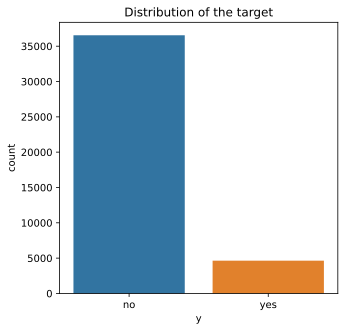

In [10]:
# distribution plot
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='y', data=df)
ax.set_title("Distribution of the target")
plt.show();

**Analysis of the Explanaroty Variables**

Preliminary analysis of the explanatory variables is required to understand the distribution of the variables, detect non-typical values, check preliminary hypotheses. Bivariate analysis with the target variable is used to detect the magnitude of potential effects.   

- `age` of the customer (numerical - continuous)

The minimum age of the contacted clients was 17 years. The maximum one was 98. This gives a very wide range of the age groups, but it makes sense to see which ones of them were most frequent.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


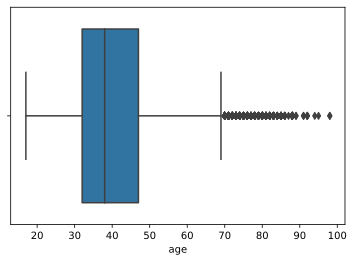

In [11]:
sns.boxplot(df['age']);

From the boxplot, we can see that contacted customers older than 70 are rather exceptions, and that most of the customers are in the age range of 17-69.

Let's see whether any age group is more prone to subscribing to the deposit.  

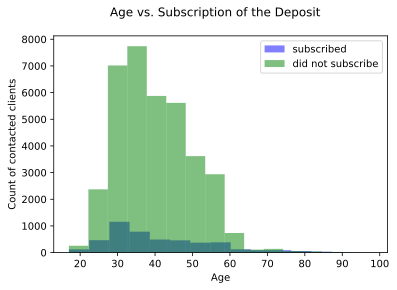

In [12]:
fig, ax = plt.subplots()

ax.hist(df[df["y"]=="yes"]["age"], bins=15, alpha=0.5, color="blue", label="subscribed")
ax.hist(df[df["y"]=='no']["age"], bins=15, alpha=0.5, color="green", label="did not subscribe")

ax.set_xlabel("Age")
ax.set_ylabel("Count of contacted clients")

fig.suptitle("Age vs. Subscription of the Deposit")

ax.legend();

Preliminary analysis might suggest that younger customers tend to subscribe to the deposit.
Let's check the density estimates.

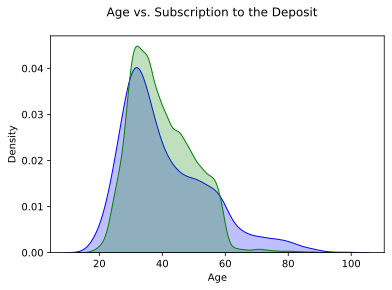

In [13]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["y"]=='yes']["age"], shade=True, color="blue", label="subscribed", ax=ax)
sns.kdeplot(df[df["y"]=='no']["age"], shade=True, color="green", label="did not subscribe", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Subscription to the Deposit");

While a small difference is noticed, it is too early to conclude that younder clients are more prone to subscribing a deposit, and further analysis is required.

In [39]:
sp.stats.ks_2samp(
    df[df.y == 'no'][continuous_features[0]],
    df[df.y == 'yes'][continuous_features[0]]
)

KstestResult(statistic=0.08608700226060761, pvalue=5.397244831045941e-27)

The p-value of Kolmogorov-Smirnov test is significantly small, which allows us to reject the null hypothesis that these samples were taken from one distribution.

In [41]:
# finding the median value 
df[df.y == 'no'][continuous_features[0]].median()

38.0

In [42]:
df[df.y == 'yes'][continuous_features[0]].median()

37.0

Let's take a look at how the average values in customer groups correlate with a positive and negative answer:

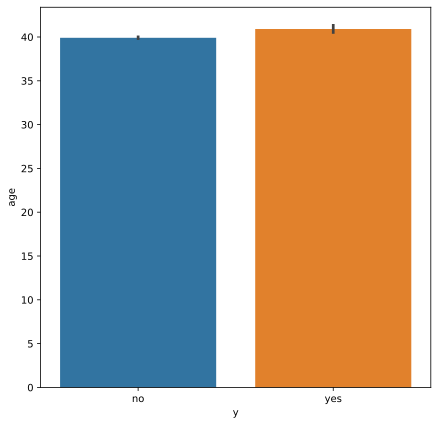

In [45]:
plt.figure(figsize=(7, 7))
sns.barplot(x='y', y=continuous_features[0], data=df)
plt.show()

It is curious that here, according to the plot, it seems like the average value of age is higher in the second group, and not in the first.

We can also compare box-plots:

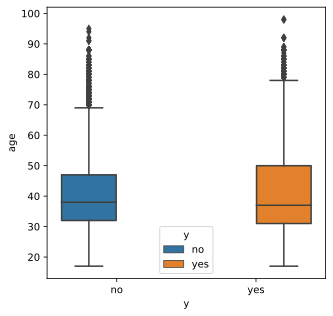

In [47]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='y', y=continuous_features[0], hue='y', data=df)
plt.show();

Box-plots also do not show any significant displacement of one distribution relative to another.

It is evident that the second group has a flatter right tail which can explain why the average value in this group is higher.

- `job` of the customer (categorical - nominal)

We can see that a disproportionate number of clients come from 3 major job categories: admin, blue-collar and technician. 


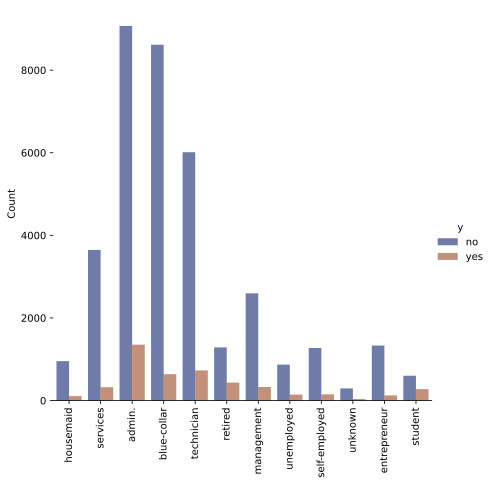

In [14]:
g = sns.catplot(
    data=df, kind="count",
    x="job", hue="y",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Count")
plt.xticks(rotation=90);

Job categories with the largest proportion of successful long-term debt subscription are students and retired — economic agents presumably without active income.  

- `default` (categorical - nominal)

In [15]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Information about the defaulted customers is contained in only 3 rows compared to 32,588 of no-default cases. This might be useful when dealing with the missing data.

- `loan` (categorical - nominal)

In [16]:
df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

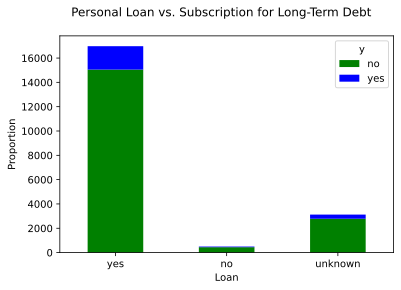

In [17]:
counts_df = df.groupby(["loan", "y"])["age"].count().unstack()
subscribed_percent_df = counts_df.T.div(counts_df.T.count()).T

fig, ax = plt.subplots()

subscribed_percent_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("Loan")
ax.set_xticklabels(['yes', 'no', 'unknown'], rotation=0)
ax.set_ylabel("Proportion")

fig.suptitle("Personal Loan vs. Subscription for Long-Term Debt");

- `month` (categorical - nominal)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

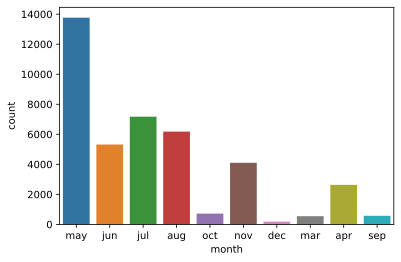

In [18]:
sns.countplot(df['month'])

It is interesting to note that a disproportional number of contacts was conducted in May, while such months as December, March, September and October were the quietest.   

- `duration` of the call (numerical - continuous) 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

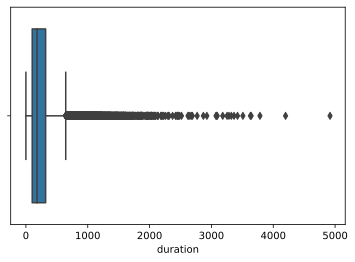

In [19]:
sns.boxplot(df['duration'])

We can see that most of the calls lasted less than 10-15 minutes with some exceptional cases of close to an 30-60 mins. 

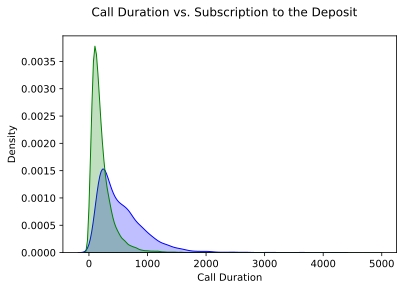

In [20]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["y"]=='yes']["duration"], shade=True, color="blue", label="subscribed", ax=ax)
sns.kdeplot(df[df["y"]=='no']["duration"], shade=True, color="green", label="did not subscribe", ax=ax)

ax.set_xlabel("Call Duration")
ax.set_ylabel("Density")

fig.suptitle("Call Duration vs. Subscription to the Deposit");

As expected, longer call durations correspond with the successful subscription. This might be due to the fact that interested clients have more questions and therefore longer discussions. On the other hand, one could think that more persuasive employees use the time to influence the client's decision. As with the other variables in the EDA step, it is impossible to conclude anything about the causal relationship. 

- `pdays`, days passed since the previous contact (numerical - continuous)

In [21]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

The majority of the clients were not contacted previously, which means we could separate them into a new category, e.g. 'New Contacts'. The same can be concluded from the analysis of Variable 14 'previous'.

- `previous`, times of previous contacts (numeric - discreet)

In [22]:
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

**Multivariate Analysis**

<AxesSubplot:>

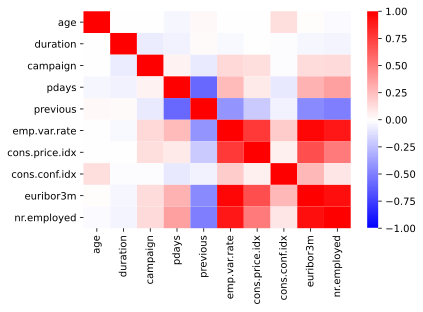

In [23]:
sns.heatmap(df[continious_features].corr(), vmin=-1, vmax=1, cmap='bwr')

Socio-economic features are highly positively correlated with each other due to their nature. 
Variables 'pdays' and 'previous' have the strongest negative correlation. 
Strong correlations might cause the problem of multicolinearity in the further analysis if we decide to keep the highly-correlated variables in the model.  

**DATA PREPARATION**

Missing Values

From the data description, we know that the missing values are denoted as 'unknown', potentially as a result of an already applied constant imputer.  
We can count the percentages of the missing values for each of the columns and check whether any of them have a critically large proportion of the missing data and therefore need to be eliminated from the further analysis. 

In [24]:
total = df.isin(['unknown']).sum().sort_values(ascending=False)
percent = (df.isin(['unknown']).sum()/df.isin(['unknown']).count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
default          8597  0.208726
education        1731  0.042027
housing           990  0.024036
loan              990  0.024036
job               330  0.008012
marital            80  0.001942
age                 0  0.000000
poutcome            0  0.000000
nr.employed         0  0.000000
euribor3m           0  0.000000
cons.conf.idx       0  0.000000
cons.price.idx      0  0.000000
emp.var.rate        0  0.000000
duration            0  0.000000
previous            0  0.000000
pdays               0  0.000000
campaign            0  0.000000
day_of_week         0  0.000000
month               0  0.000000
contact             0  0.000000

Overall, the dataset does not contain large proportions of missing data. 
The only outstanding column is 'default'. Taking into account that there are only 3 rows with 'yes' value, and >99% are 'no' and 'unknown' values, it would be too damaging to delete all the 'unknon' rows since a lot of information could be lost. Therefore, we keep 'unknown' in the 'default' variable as a separate category for further analysis as an exception. 

In [25]:
df = df.drop((missing_data[(missing_data['Total'] > 1) & (missing_data['Total'] < 2000)]).index,1)